# Data Understanding & Requirements

The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.


Columns Explanation



# Instructions



*  Install the necessary packages


*   Import you data and perform basic data exploration phase


           * Display general information about the dataset


           * Create a pandas profiling reports to gain insights into the dataset

           * Handle Missing and corrupted values
          
           * Handle outliers, if they exist

           * Encode categorical features


*   Based on the previous data exploration train and test a machine learning classifier


*   Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form


*   Import your ML model into the streamlit application and start making predictions given the provided features values




*   Deploy your application on Streamlit share


      *   Create a github and a streamlit share accounts


      *   Create a new git repo

      *   Upload your local code to the newly created git repo

      *   log in to your streamlit account an deploy your application from the git repo





# Reading & Loading the data

In [1]:
import pandas as pd
data= pd.read_csv('/content/Financial_inclusion_dataset.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# General Information & Basic Statistics

In [2]:
print (data.info())
print(data.describe().T)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None
                     count         mean        std     

# Pandas Profiling Report

In [3]:
# importing profile report
!pip install ydata_profiling
from ydata_profiling import ProfileReport
#generating the report
profile = ProfileReport(data,title= ' Financial Inclusion Pandas profiling Report')
# savng the report to notebook
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d2958528d6c904a9aafb2efbe202a3d8c05d0a95bc08afd5354924d16f1d108a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing Values

In [4]:
# checking for missing values
data.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


dataset is clean with no missing values

#Duplicated Values

In [5]:
# checking for duplicates
data.duplicated().sum()

0

# Outliers

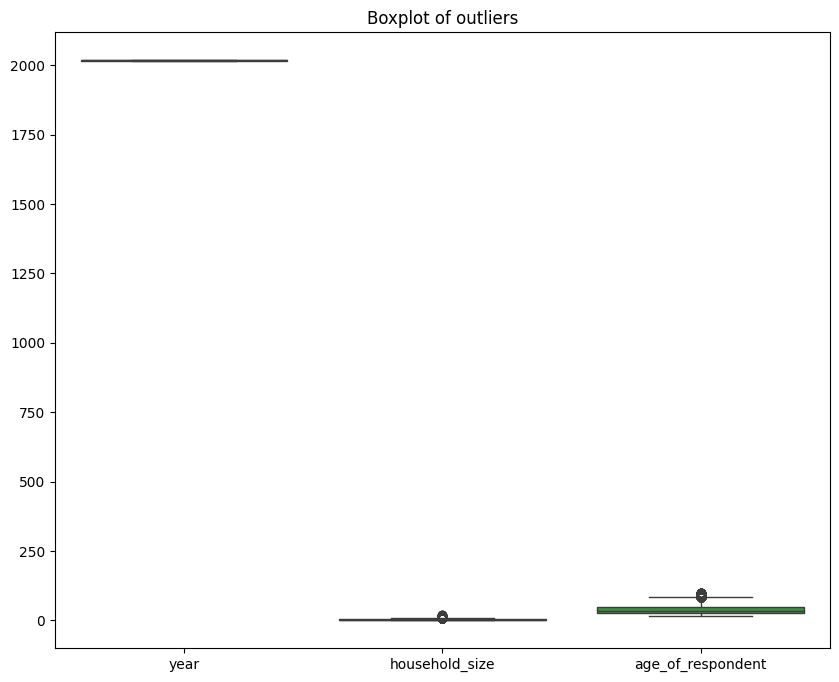

In [6]:
# checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
# plotting for outliers in numeric columns

plt.figure(figsize=(10,8))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.title('Boxplot of outliers')
plt.show()


Handling the outliers using the Winsorize method

In [7]:
from scipy.stats.mstats import winsorize
data['household_size']= winsorize(data['household_size'],limits=(0.02,0.02))
data['age_of_respondent']= winsorize(data['age_of_respondent'],limits=(0.02,0.02))


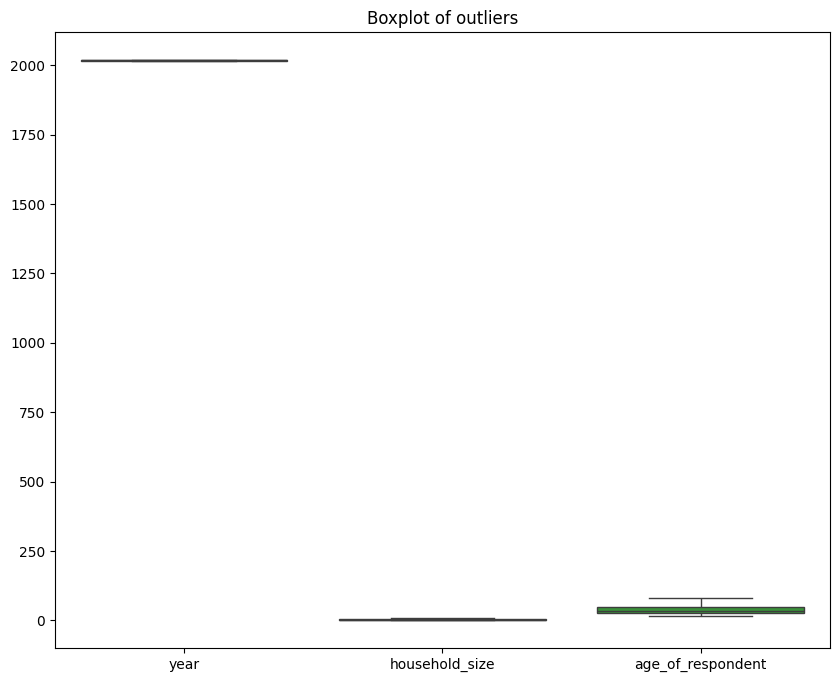

In [8]:
#visualizing data after outlier removal
plt.figure(figsize=(10,8))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.title('Boxplot of outliers')
plt.show()

#Data Visualization

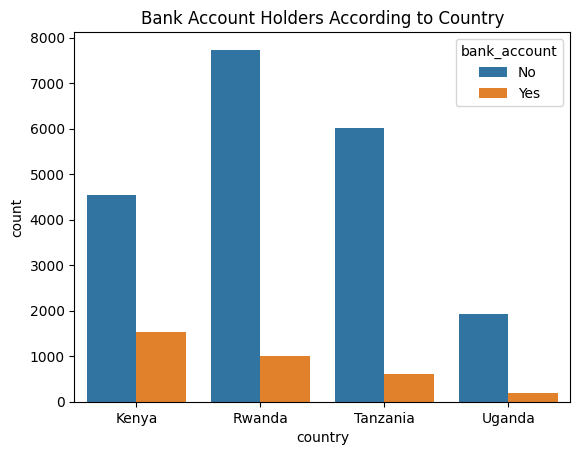

In [9]:
# visualizing  the bank account holders accordng to country
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by country and bank_account, and count the occurrences
account_counts = data.groupby(['country', 'bank_account'])['bank_account'].count().reset_index(name='count')

# Create the bar plot using the grouped data
sns.barplot(x='country', y='count', hue='bank_account', data=account_counts)
plt.title('Bank Account Holders According to Country')
plt.show()



majority of  residents in Rwanda and Tanzania do not own bank accounts .kenya consists of majority of account_owners.

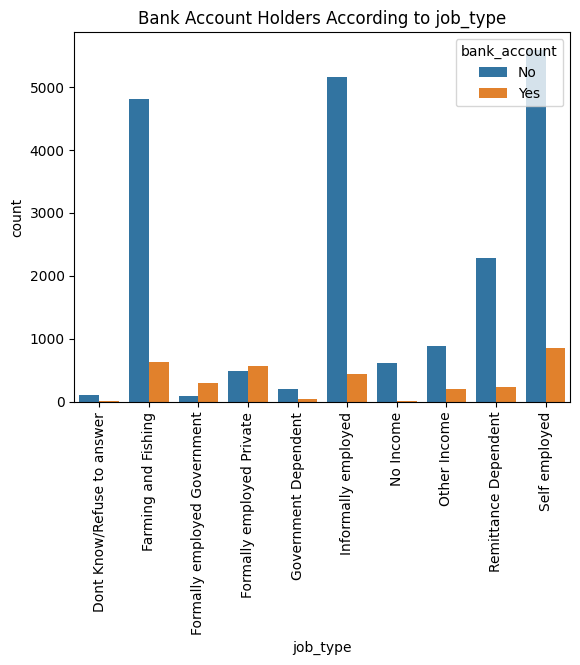

In [10]:
# Bank account holders in relation to job type
# Group the data by job_type and bank_account, and count the occurrences
account_counts = data.groupby(['job_type', 'bank_account'])['bank_account'].count().reset_index(name='count')

# Create the bar plot using the grouped data
sns.barplot(x='job_type', y='count', hue='bank_account', data=account_counts)
plt.title('Bank Account Holders According to job_type')
plt.xticks(rotation=90)
plt.show()


self employed people are the majority without bank accounts as well a s the majority with bank accounts.

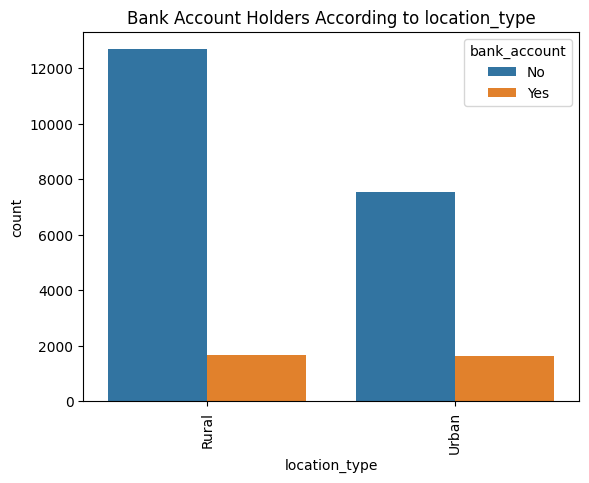

In [11]:
# bank_account by location type
# Group the data by location_type and bank_account, and count the occurrences
account_counts = data.groupby(['location_type', 'bank_account'])['bank_account'].count().reset_index(name='count')

# Create the bar plot using the grouped data
sns.barplot(x='location_type', y='count', hue='bank_account', data=account_counts)
plt.title('Bank Account Holders According to location_type')
plt.xticks(rotation=90)
plt.show()


Majority of the individuals that do not own bank accounts come from the rural aresa however there is balance on those who own accounts between the rural and urban areas.

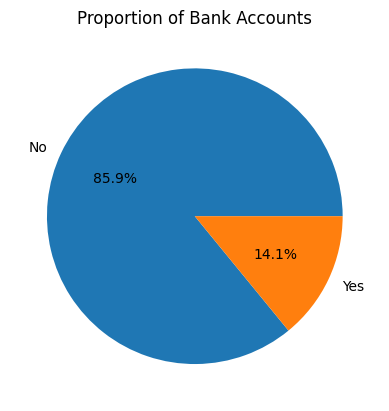

In [12]:


# value counts for each category in the 'bank_account' column
bank_account_counts = data['bank_account'].value_counts()

# Create the pie chart using the value counts
plt.pie(bank_account_counts, labels=bank_account_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Bank Accounts')
plt.show()

Majority of this population do not own bank accounts

# Encoding categorical features

In [13]:
from sklearn.preprocessing import LabelEncoder
#initializing label encoder
encoder= LabelEncoder()
# encoding the categorical columns
data['bank_account']= encoder.fit_transform(data['bank_account'])
data['location_type']= encoder.fit_transform(data['location_type'])
data['cellphone_access']= encoder.fit_transform(data['cellphone_access'])
data['gender_of_respondent']= encoder.fit_transform(data['gender_of_respondent'])
data['relationship_with_head']= encoder.fit_transform(data['relationship_with_head'])
data['marital_status']= encoder.fit_transform(data['marital_status'])
data['education_level']= encoder.fit_transform(data['education_level'])
data['job_type']= encoder.fit_transform(data['job_type'])
data['country']= encoder.fit_transform(data['country'])

In [14]:
# checking the encoded datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  int64 
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5


# Machine Learning Model

We shall use the random forest classifier to ttrain the machine learning model

Defining Features & targets

In [16]:
y=data['bank_account']
x=data[['country','location_type','cellphone_access','household_size','age_of_respondent','marital_status','education_level','job_type','relationship_with_head']]

Splitting data into train & test sets

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.42,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13643, 9)
(9881, 9)
(13643,)
(9881,)


In [18]:
# using the SMOTE technique
from imblearn.over_sampling import SMOTE
#Initializing Smote
smote= SMOTE()
# fitting smote to the data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

In [19]:
y_train_resampled.value_counts()

,count
bank_account,
0,11707
1,11707


Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler
# initializing standard scaler
scaler= StandardScaler()
# scaling the data
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [21]:
# checking statistics of scaled data
data.describe().T

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,count,mean,std,min,25%,50%,75%,max
country,23524.0,1.202091,0.925101,0.0,0.0,1.0,2.0,3.0
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
bank_account,23524.0,0.140792,0.347815,0.0,0.0,0.0,0.0,1.0
location_type,23524.0,0.390282,0.487824,0.0,0.0,0.0,1.0,1.0
cellphone_access,23524.0,0.741966,0.437562,0.0,0.0,1.0,1.0,1.0
household_size,23524.0,3.762795,2.117558,1.0,2.0,3.0,5.0,9.0
age_of_respondent,23524.0,38.707618,16.168969,17.0,26.0,35.0,49.0,79.0
gender_of_respondent,23524.0,0.410092,0.491861,0.0,0.0,0.0,1.0,1.0
relationship_with_head,23524.0,2.217267,1.893394,0.0,1.0,1.0,5.0,5.0
marital_status,23524.0,2.392748,0.999477,0.0,2.0,2.0,3.0,4.0


In [22]:
from sklearn.ensemble  import RandomForestClassifier
# initializing the model
model = RandomForestClassifier()
# fitting the model
model.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [23]:
# making predictions
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

# Model performnace & Evaluation

In [24]:
# model performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8311911749822892
[[7699  806]
 [ 862  514]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8505
           1       0.39      0.37      0.38      1376

    accuracy                           0.83      9881
   macro avg       0.64      0.64      0.64      9881
weighted avg       0.83      0.83      0.83      9881



# Results & Explanations

Accuracy


The accuracy of the model is 83% meaning the model is perfroming fairly well but there is room for improvement.

Confusion Matrix

True Negative- (7699)  the number of no bank account cases that were correctly identified  as 0.


False positive-(806)  the number of no bank account cases that were incorrectly identified.


false negative (862)  -the number of bank account cases(1) that were incorrectly identified as no bank account


True positive (514) -The number of bank account cases that were correctly identified as  1.


# Saving the model

In [26]:
# saving the model
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']